## Data Preparation

- Read raw dataset and perform filtering
- Split filtered dataset into chunks of length $100,000$

In [1]:
import numpy as np
from utils import load_data, create_dataset_splits, plot_long_tail
from src.config import DATA_DIRECTORY

### 1. Read the raw Dataset

- `ROWS = None` refers to read the entire dataset
- Drop duplicates of subsets of {`userID`,`itemID`}
- apply $p$-core with $p=20$ to both users and items
- plot long-tail distribution

In [17]:
FILENAME = DATA_DIRECTORY.joinpath("mids-raw/mids_RAW_ANONYMIZED.txt")
ROWS = None

In [18]:
# HINT. takes ~3min
db_interaction = load_data(FILENAME, rows = ROWS)

In [19]:
P_CORE = 20

db_interaction_without_duplicates = db_interaction.drop_duplicates(subset=["userID", "itemID"], ignore_index=True)

filter_tracks = db_interaction_without_duplicates['itemID'].value_counts() > P_CORE
filter_tracks = filter_tracks[filter_tracks].index.tolist()

filter_users = db_interaction_without_duplicates['userID'].value_counts() >= P_CORE
filter_users = filter_users[filter_users].index.tolist()

db_interaction_without_duplicates_p_core_applied = db_interaction_without_duplicates[db_interaction_without_duplicates['userID'].isin(filter_users)]
db_interaction_without_duplicates_p_core_applied = db_interaction_without_duplicates_p_core_applied[db_interaction_without_duplicates_p_core_applied['itemID'].isin(filter_tracks)]

In [20]:
num_users = db_interaction_without_duplicates_p_core_applied["userID"].nunique()
num_items = db_interaction_without_duplicates_p_core_applied["itemID"].nunique()
num_interactions = db_interaction_without_duplicates_p_core_applied.shape[0]
density = num_interactions / (num_users * num_items)

print("Number of interactions: ", num_interactions)
print("Number of users, items: ", f"{num_users}, {num_items}")
print("Sparsity: ", f"{((1 - density) * 100):.5f}%")

Number of interactions:  17665904
Number of users, items:  58747, 37370
Sparsity:  99.19531%


In [21]:
n_downloads_per_user = db_interaction_without_duplicates_p_core_applied["userID"].value_counts()
mean_downloads_per_user = n_downloads_per_user.mean()
median_downloads_per_user = np.median(n_downloads_per_user)

print(f"Most user interactions: {n_downloads_per_user.max()}")
print(f"Least user interactions: {n_downloads_per_user.min()}")
print(f"The median / mean is {median_downloads_per_user:.0f} / {mean_downloads_per_user:.0f} interactions per user.")

Most user interactions: 32833
Least user interactions: 20
The median / mean is 133 / 301 interactions per user.


In [22]:
n_downloads_per_track =db_interaction_without_duplicates_p_core_applied["itemID"].value_counts()
mean_downloads_per_track = n_downloads_per_track.mean()
median_downloads_per_track = np.median(n_downloads_per_track)

print(f"Most track interactions: {n_downloads_per_track.max()}")
print(f"Least track interactions: {n_downloads_per_track.min()}")
print(f"The median / mean is {median_downloads_per_track:.0f} / {mean_downloads_per_track:.0f} interactions per track.")

Most track interactions: 14037
Least track interactions: 21
The median / mean is 205 / 473 interactions per track.


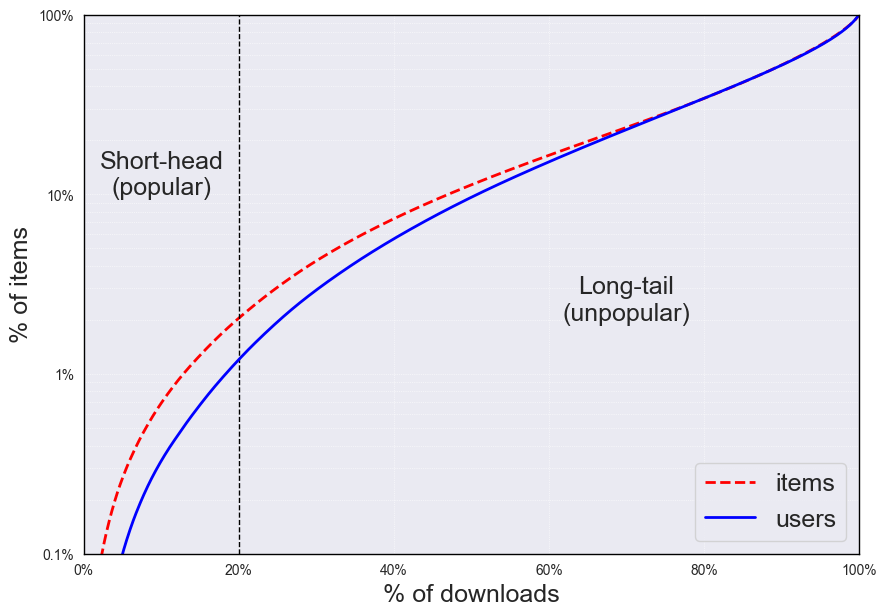

In [23]:
plot_long_tail(db_interaction_without_duplicates_p_core_applied, n_downloads_per_track, save_fig = False)

### 2. Data Splitting

- Split the entire dataset in a "cross-fold" fashion of chunks with size $100,000$

In [27]:
chunk_size = 100000
create_dataset_splits(db_interaction_without_duplicates, chunk_size=chunk_size)

100%|██████████| 177/177 [00:49<00:00,  3.55splits/s]
